# Continuous least-squares approximation

In [1]:
using FundamentalsNumericalComputation

Let's approximate $e^x$ over the interval $[−1,1]$. We can sample it at, say, 20 points, and find the best-fitting straight line to that data.

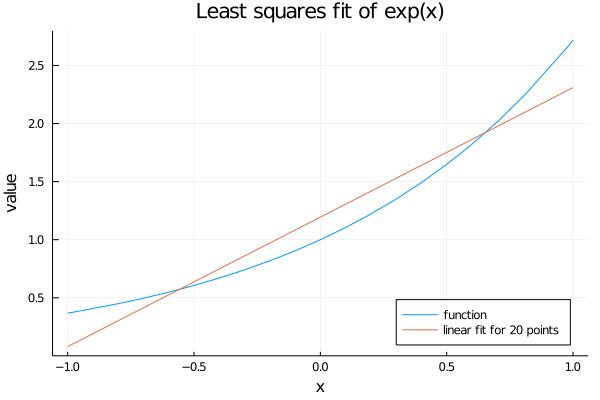

In [11]:
plot(exp,-1,1,label="function")

t = LinRange(-1,1,20)
y = exp.(t)
V = [ ti^j for ti in t, j in 0:1 ]  # Vandermonde-ish
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="linear fit for 20 points",
    xaxis=("x"),yaxis=("value"),title="Least squares fit of exp(x)",leg=:bottomright)


There's nothing special about 40 points. By choosing more, we approach the limit of a continuous approximation.

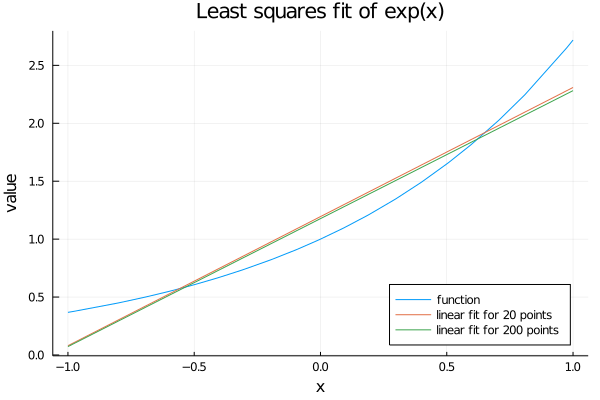

In [12]:
t = LinRange(-1,1,200)
y = exp.(t)
V = [ ti^j for ti in t, j=0:1 ]
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="linear fit for 200 points",
    xaxis=("x"),yaxis=("value"),title="Least squares fit of exp(x)",leg=:bottomright)

The approximation barely changed. The situation is unlike interpolation, where the degree of the interpolant increases with the number of nodes, causing instability in the equispaced case. Here, the linear fit is apparently approaching a limit of least-squares fitting in a continuous sense over the interval.

In [17]:
n = 40:60:400
slope = zeros(size(n))
intercept = zeros(size(n))

for (k,n) in enumerate(n)
    t = LinRange(-1,1,n)
    y = exp.(t)
    V = [ ti^j for ti in t, j=0:1 ]
    c = V\y
    intercept[k],slope[k] = c
end

pretty_table((n=n,intercept=intercept,slope=slope),nosubheader=true)

┌─────┬───────────┬─────────┐
│   n │ intercept │   slope │
├─────┼───────────┼─────────┤
│  40 │   1.18465 │ 1.10906 │
│ 100 │   1.17892 │ 1.10579 │
│ 160 │   1.17752 │ 1.10498 │
│ 220 │   1.17688 │ 1.10462 │
│ 280 │   1.17652 │ 1.10441 │
│ 340 │   1.17629 │ 1.10427 │
│ 400 │   1.17612 │ 1.10418 │
└─────┴───────────┴─────────┘


Conceptually, in the limit $n\to\infty$, every point is taken into consideration, not just the nodes.